In [4]:
cd ..

/home/sahmednav/Projects/Thesis/MastersThesis3/MastersThesis/dataset


In [8]:
import pandas as pd

# Replace 'dataset.csv' with the path to your CSV file
df = pd.read_csv("SUNRGBD_Dataset/SUNRGBD/csv_data/individual_datasets/test_dataset.csv")

df.head()


,Question_Id,Questions,Answers,Image_Path,Depth_Path,Question_Type,IDs
0,1,How many printers are there?,one,SUNRGBD/kv2/kinect2data/000689_2014-06-08_13-0...,SUNRGBD/kv2/kinect2data/000689_2014-06-08_13-0...,Count,1.0
1,2,How many book shelfs are there?,one,SUNRGBD/realsense/lg/2014_10_28-15_49_03-13110...,SUNRGBD/realsense/lg/2014_10_28-15_49_03-13110...,Count,2.0
2,3,How many windows are there?,two,SUNRGBD/xtion/sun3ddata/brown_cs_4/brown_cs4/0...,SUNRGBD/xtion/sun3ddata/brown_cs_4/brown_cs4/0...,Count,3.0
3,4,How many dressers are there?,one,SUNRGBD/kv2/kinect2data/002170_2014-06-26_19-4...,SUNRGBD/kv2/kinect2data/002170_2014-06-26_19-4...,Count,4.0
4,5,How many ouchs are there?,one,SUNRGBD/xtion/sun3ddata/mit_w85k1/scan_1/00082...,SUNRGBD/xtion/sun3ddata/mit_w85k1/scan_1/00082...,Count,5.0


In [9]:
image_path_series = df["Image_Path"].tolist()
print(len(image_path_series))
print(len(set(image_path_series)))

11888
2033


In [7]:
import os
import pandas as pd

# Specify the folder path
folder_path = 'output_path/final_dataset/'

total = 0
# Loop over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a CSV
    if filename.endswith('.csv') and filename != 'final_dataset.csv':
        # Create the full path to the file
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Get the number of rows
        num_rows = len(df)
        total = total + num_rows
        
        # Print the filename and the number of rows
        print(f'File: {filename}, Number of rows: {num_rows}')

print(f'Total number of rows: {total}')

File: color_questions.csv, Number of rows: 17742
File: count_qa.csv, Number of rows: 8315
File: object_identification.csv, Number of rows: 5875
File: proximity_qa.csv, Number of rows: 19272
File: yes_no_qa.csv, Number of rows: 20372
File: direction_questions.csv, Number of rows: 9668
Total number of rows: 81244


In [12]:
column_name = 'Answers'

# Convert all values in the specified column to lowercase
df[column_name] = df[column_name].str.lower()

# Find the frequency of each unique value in the column
value_counts = df[column_name].value_counts()

value_counts.head(20)

Answers
floor         499
table         481
wall          449
bed           440
chair         327
cabinet       228
door          187
desk          180
sofa          165
window        162
shelf         120
couch         103
carpet         93
curtain        80
counter        59
ceiling        54
bookshelf      52
dresser        48
blinds         47
whiteboard     45
Name: count, dtype: int64

In [4]:
import re
from collections import Counter

def extract_nouns(questions):
    pattern = re.compile(r'How many (\w+) are there\?')
    nouns = pattern.findall(" ".join(questions))
    return nouns

def get_noun_count(df):
    # Extract nouns from the 'Questions' column
    nouns = extract_nouns(df['Questions'])
    
    # Count the occurrences of each noun
    noun_counts = Counter(nouns)
    
    # Convert to DataFrame
    noun_df = pd.DataFrame(noun_counts.items(), columns=['Noun', 'Count'])
    
    # Sort the DataFrame in ascending order by count and return the top 20
    sorted_noun_df = noun_df.sort_values(by='Count', ascending=False)
    
    return sorted_noun_df

df = pd.read_csv("output_path/final_dataset/count_qa.csv")
sorted_df = get_noun_count(df)
print(sorted_df.head(30))


         Noun  Count
80      Walls   1100
29    windows   1100
222    chairs   1100
79     Floors   1100
33     tables   1100
4      floors   1100
9       walls   1100
306     doors   1100
312    Chairs   1100
62   pictures   1100
287  cabinets   1100
43       boxs   1097
60     papers   1096
21      desks   1032
5    ceilings    959
7     pillows    923
1       lamps    907
0        beds    866
311    Tables    862
297     books    775
385    shelfs    764
256   bottles    719
18      sofas    680
12       bags    664
234     WALLs    611
307  curtains    595
512    bookss    576
163  monitors    551
67    Windows    547
2     mirrors    542


In [17]:
print(median_value)

1.0


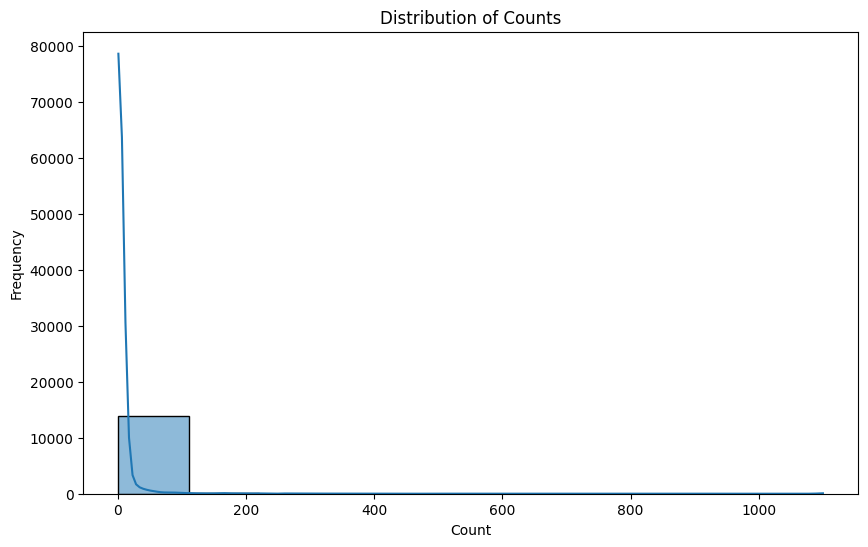

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(sorted_df['Count'], kde=True,bins=10)

# Set plot title and labels
plt.title('Distribution of Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [3]:
from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image
import requests

# Load the image and model
# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = ViltProcessor.from_pretrained('dandelin/vilt-b32-finetuned-vqa')
model = ViltForQuestionAnswering.from_pretrained('dandelin/vilt-b32-finetuned-vqa')

# Ask a question
question = "What is the color of the main object?"

# Prepare inputs
inputs = processor(image, question, return_tensors="pt")

# Get the answer
outputs = model(**inputs)
logits = outputs.logits
answer = model.config.id2label[logits.argmax(-1).item()]

print(f"Question: {question}")
print(f"Answer: {answer}")

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/home/sahmednav/anaconda3/envs/thesis/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

Question: What is the color of the main object?
Answer: pink
